In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
data_path = Path.cwd().parent / 'data' / 'advertising.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


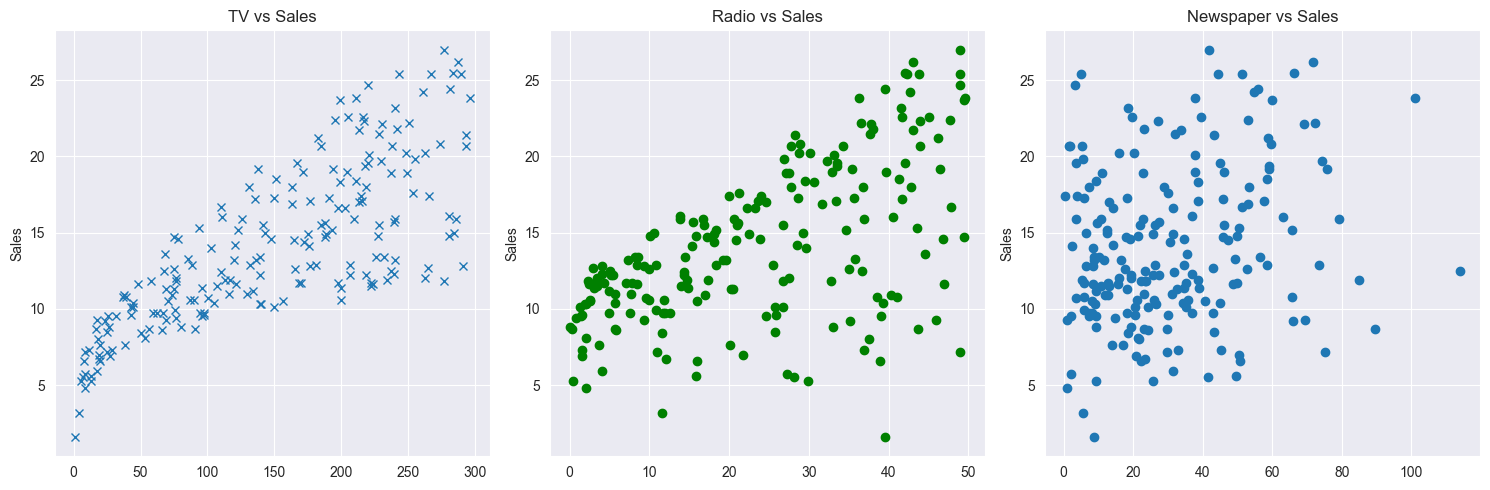

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(df['TV'], df['sales'], 'x')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')

axes[1].plot(df['radio'], df['sales'], 'go')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')
plt.tight_layout()

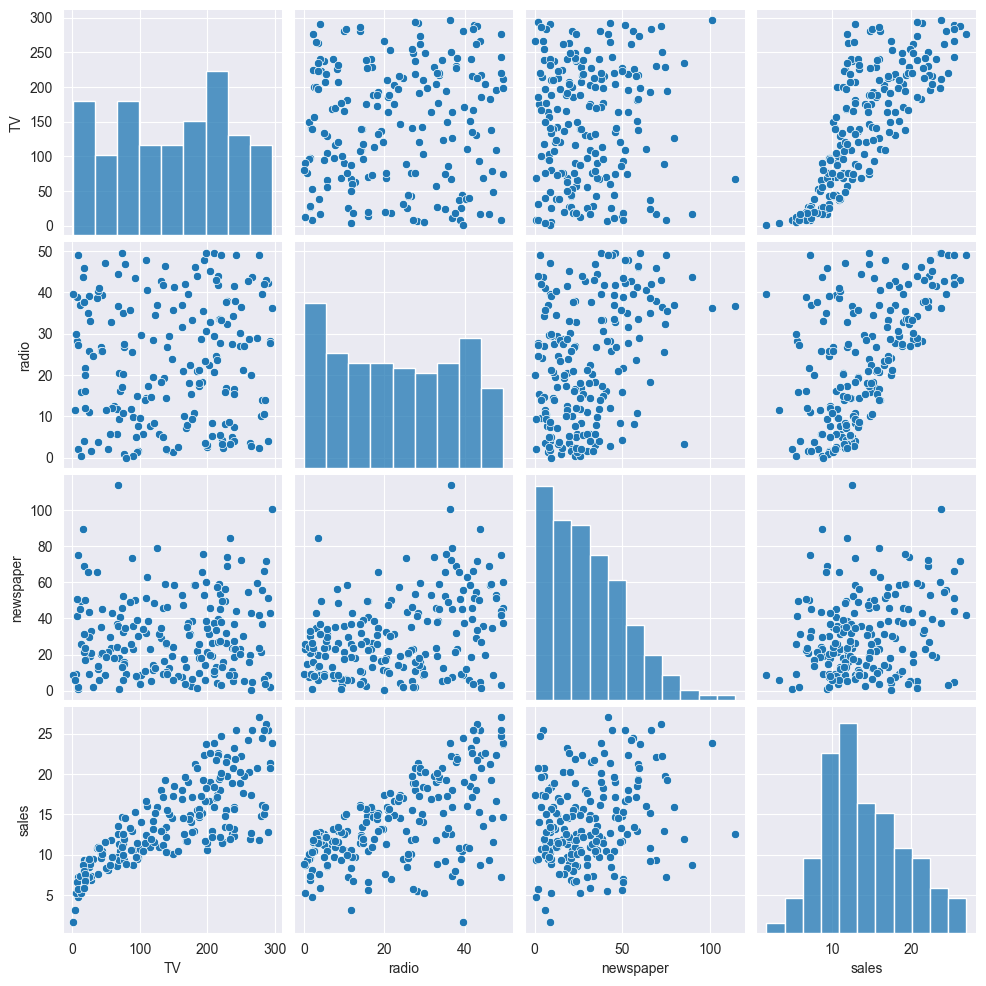

In [5]:
sns.pairplot(df)

In [6]:
X = df.drop('sales', axis=1)
y = df['sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
test_predictions = model.predict(X_test)

In [13]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
MAE = mean_absolute_error(y_test, test_predictions)

In [16]:
MSE = mean_squared_error(y_test, test_predictions)

In [17]:
RMSE = np.sqrt(MSE)

In [18]:
MAE

1.213745773614481

In [19]:
MSE

2.2987166978863782

In [20]:
RMSE

1.516151937599388

# RESIDUALS

In [21]:
quarter_path = Path.cwd().parent / 'data' / 'anscombes_quartet1.csv'

In [22]:
quartet = pd.read_csv(quarter_path)

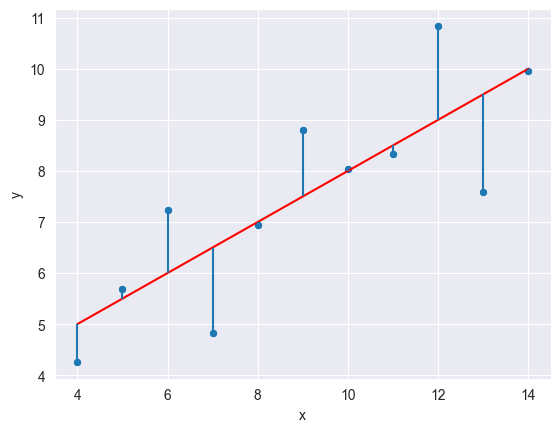

In [23]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residuals'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['y'] - quartet['residuals'])

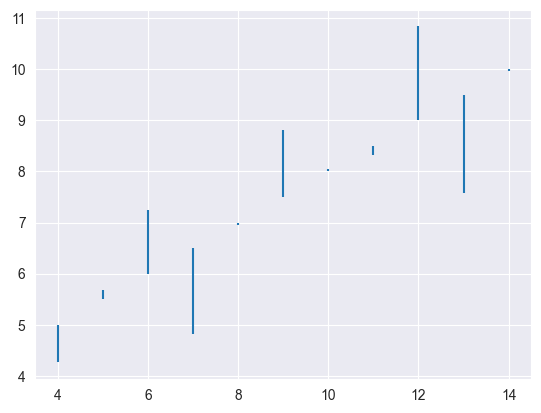

In [24]:
plt.vlines(quartet['x'], quartet['y'], quartet['y'] - quartet['residuals'])

<Axes: xlabel='residuals', ylabel='Density'>

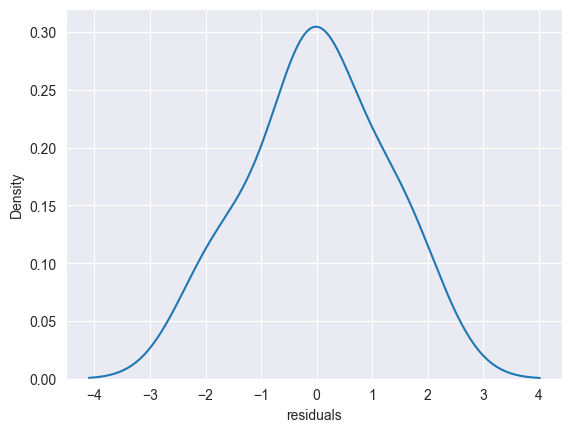

In [25]:
sns.kdeplot(quartet['residuals'])

In [26]:
quartet['residuals']

0     0.04
1    -0.05
2    -1.92
3     1.31
4    -0.17
5    -0.04
6     1.24
7    -0.74
8     1.84
9    -1.68
10    0.18
Name: residuals, dtype: float64

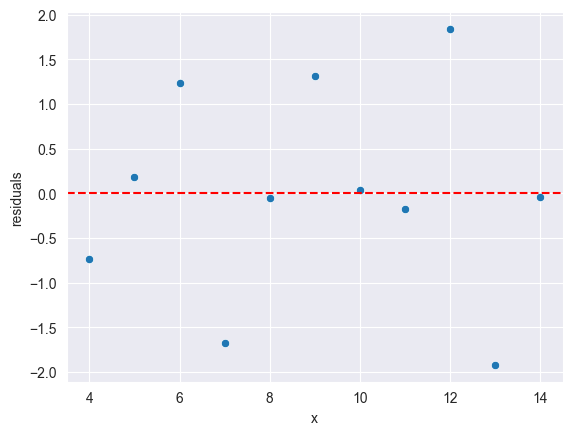

In [27]:
sns.scatterplot(data=quartet, x='x', y='residuals')
plt.axhline(y=0, color='red', linestyle='--')

In [28]:
quartet_path = Path.cwd().parent / 'data' / 'anscombes_quartet2.csv'
quartet = pd.read_csv(quartet_path)

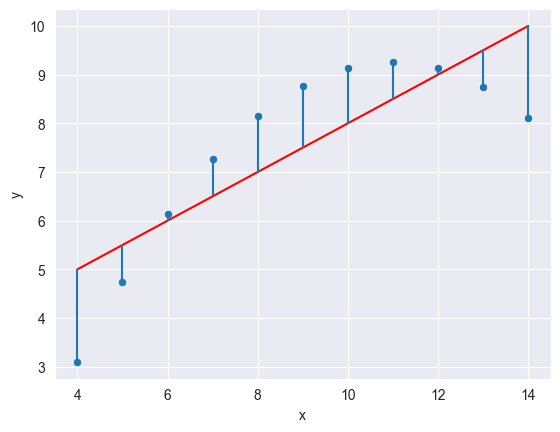

In [29]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y'] - quartet['residual'])

<Axes: xlabel='residual', ylabel='Density'>

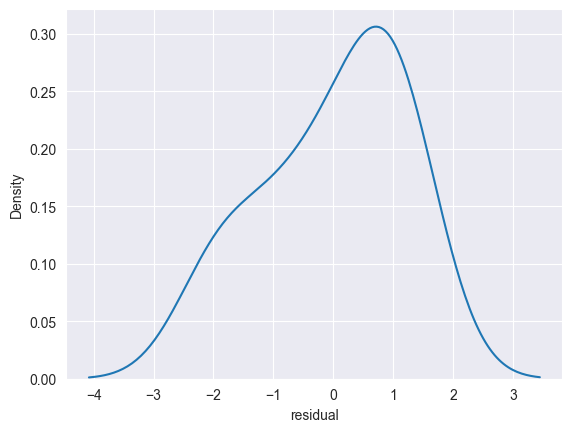

In [30]:
sns.kdeplot(quartet['residual'])

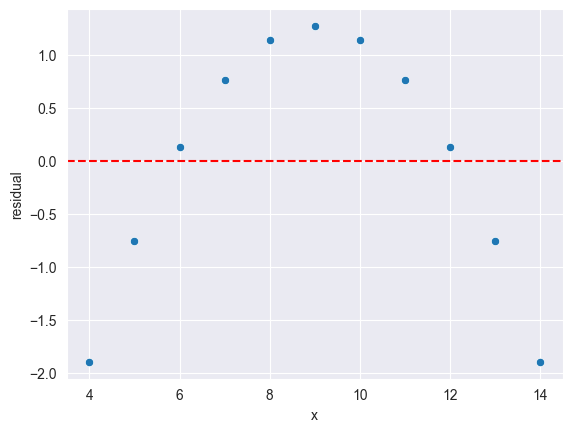

In [31]:
sns.scatterplot(data=quartet, x='x', y='residual')
plt.axhline(y=0, color='red', linestyle='--')

In [32]:
quartet_path = Path.cwd().parent /'data'/ 'anscombes_quartet4.csv'
quartet = pd.read_csv(quartet_path)

In [33]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [34]:
quartet['residuals'] = quartet['y'] - quartet['pred_y']

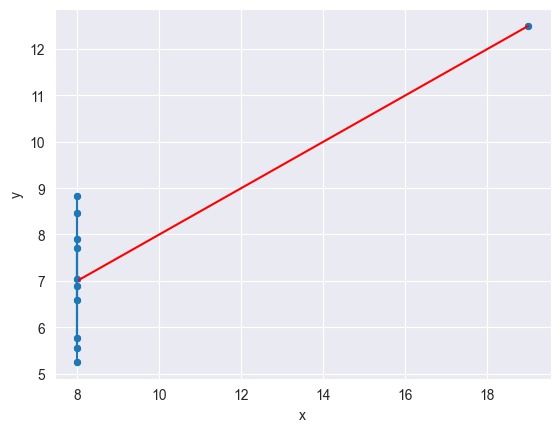

In [35]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['y'] - quartet['residuals'])

<Axes: xlabel='residuals', ylabel='Density'>

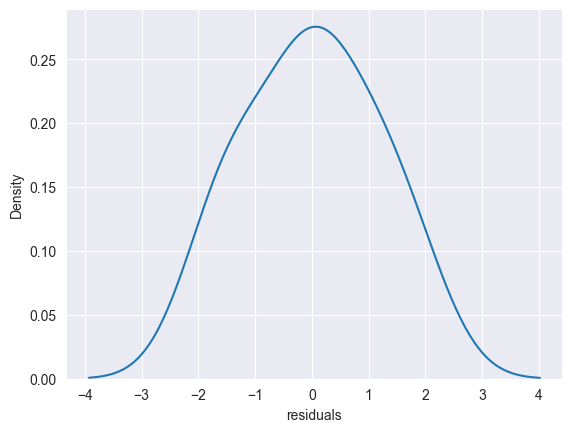

In [36]:
sns.kdeplot(quartet['residuals'])

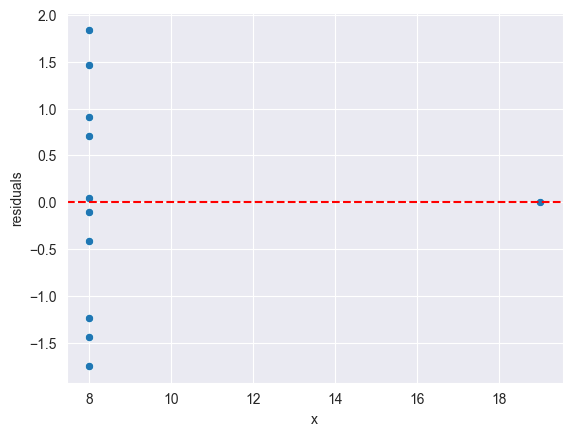

In [37]:
sns.scatterplot(data=quartet, x='x', y='residuals')
plt.axhline(y=0, color='red', linestyle='--')

# Plotting Residuals

In [38]:
test_predictions = model.predict(X_test)

In [39]:
test_res = y_test - test_predictions

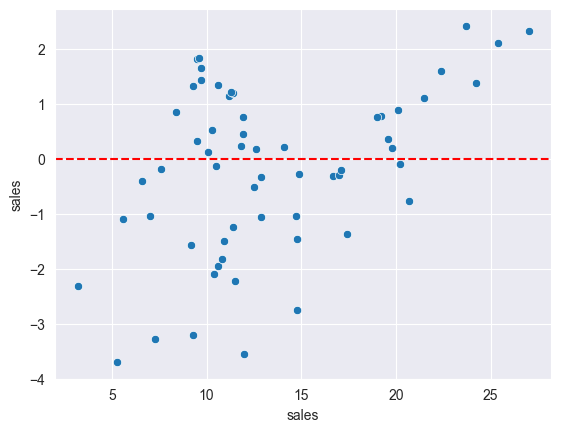

In [40]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0, color='red', linestyle='--')

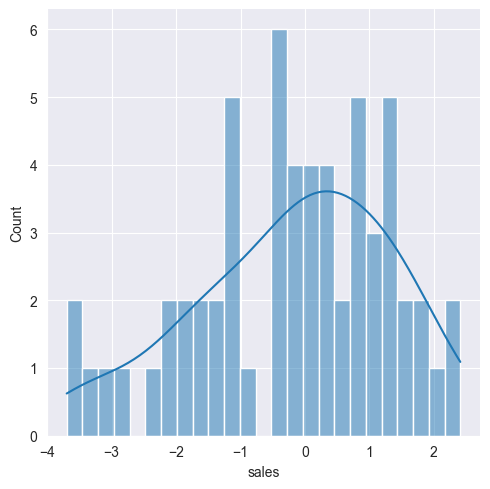

In [41]:
sns.displot(data=test_res, bins=25, kde=True)

In [42]:
import scipy as sp

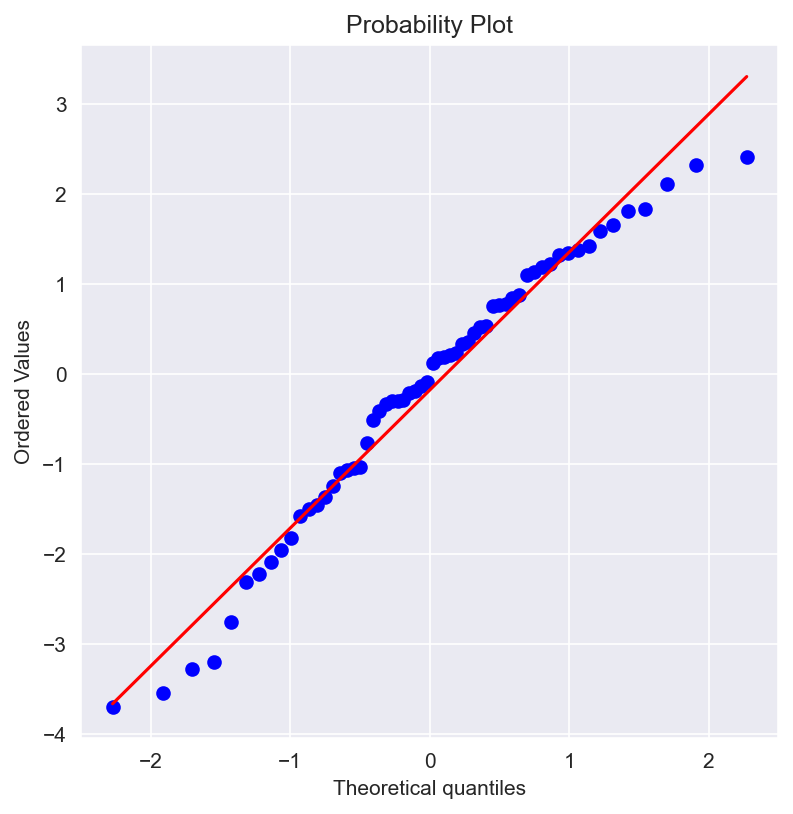

In [43]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
_ = sp.stats.probplot(test_res, plot=ax)

# Retraining Model on Full Data

In [44]:
final_model = LinearRegression()

In [45]:
final_model.fit(X, y)

LinearRegression()

# Deployment, Predictions and Model Persistence

## Final Model Fit
Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [46]:
y_hat = final_model.predict(X)

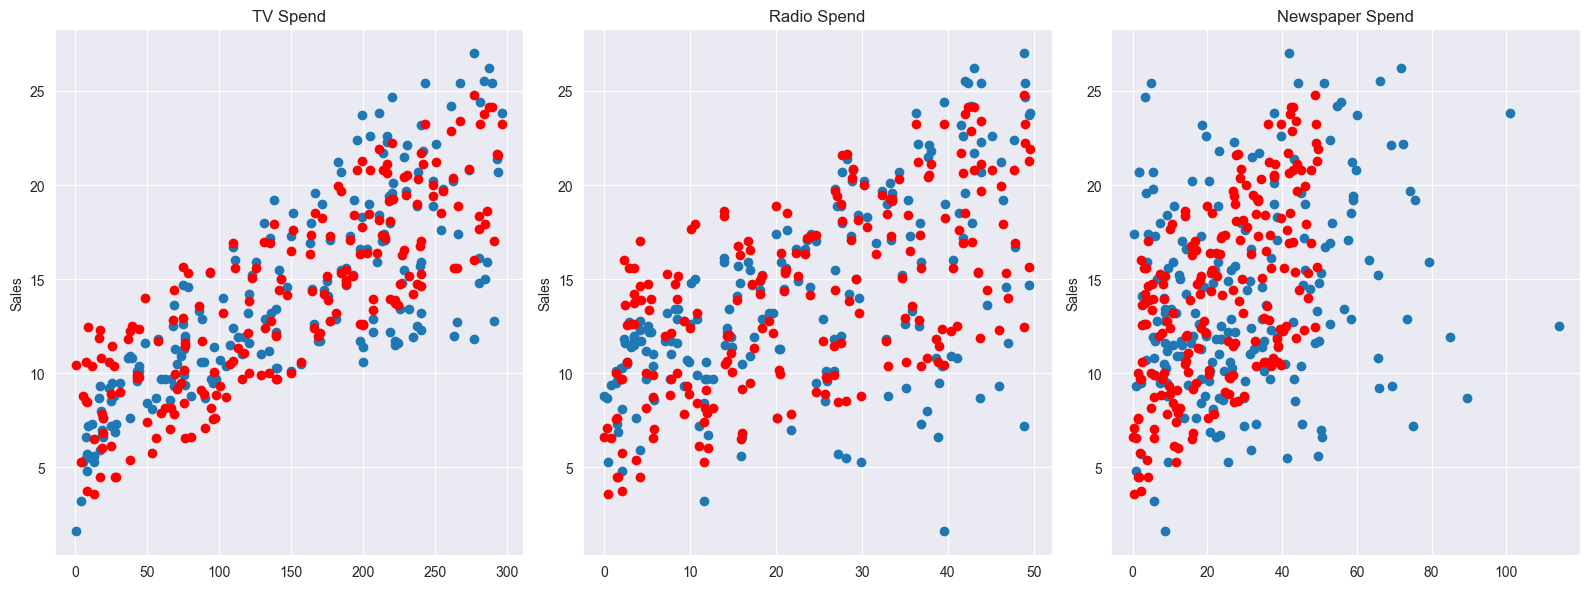

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

# Residuals

In [48]:
residuals = y - y_hat

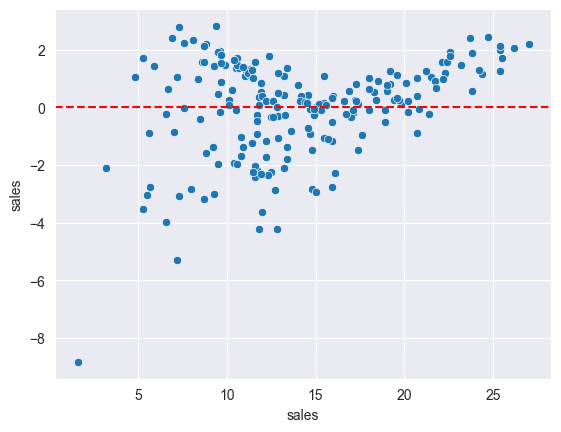

In [49]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')

# Coefficients

In [50]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [51]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])

In [52]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [53]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [54]:
campaign = pd.DataFrame({'TV': [149], 'radio': [22], 'newspaper': [12]})

In [55]:
final_model.predict(campaign)

array([13.893032])

In [56]:
from joblib import dump, load

In [57]:
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [58]:
loaded_model = load('final_model.joblib')

In [59]:
loaded_model.predict(campaign)

array([13.893032])